In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/USER/OneDrive - Universidad de los andes/Analitica comp/proyecto3-data-trio/reportes/ingeniera_de_datos/clean_saber11.csv', sep=',')


In [3]:
data.shape

(83297, 29)

In [4]:
data.columns

Index(['Unnamed: 0', 'periodo', 'estu_tipodocumento', 'cole_area_ubicacion',
       'cole_bilingue', 'cole_caracter', 'cole_genero', 'cole_jornada',
       'cole_mcpio_ubicacion', 'cole_naturaleza', 'cole_sede_principal',
       'estu_fechanacimiento', 'estu_genero', 'fami_cuartoshogar',
       'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda',
       'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador',
       'fami_tieneinternet', 'fami_tienelavadora', 'desemp_ingles',
       'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
       'punt_c_naturales', 'punt_lectura_critica', 'punt_global'],
      dtype='object')

In [5]:
data.dtypes

Unnamed: 0                    int64
periodo                       int64
estu_tipodocumento           object
cole_area_ubicacion          object
cole_bilingue                object
cole_caracter                object
cole_genero                  object
cole_jornada                 object
cole_mcpio_ubicacion         object
cole_naturaleza              object
cole_sede_principal          object
estu_fechanacimiento         object
estu_genero                  object
fami_cuartoshogar            object
fami_educacionmadre          object
fami_educacionpadre          object
fami_estratovivienda         object
fami_personashogar           object
fami_tieneautomovil          object
fami_tienecomputador         object
fami_tieneinternet           object
fami_tienelavadora           object
desemp_ingles                object
punt_ingles                 float64
punt_matematicas            float64
punt_sociales_ciudadanas      int64
punt_c_naturales              int64
punt_lectura_critica        

In [6]:
data = data.drop(columns='Unnamed: 0')

## Estadisticas Descriptivas Variables Numéricas

In [7]:
data.describe()

,periodo,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,83297.000000,83297.000000,83297.000000,83297.000000,83297.000000,83297.000000,83297.000000
mean,20174.086150,49.383878,50.871424,49.210884,50.803991,51.669388,252.712114
std,27.195352,10.692126,11.549282,11.109798,10.014895,9.853306,46.994209
min,20142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,20152.000000,42.000000,43.000000,41.000000,44.000000,45.000000,218.000000
50%,20172.000000,48.000000,50.000000,49.000000,50.000000,51.000000,249.000000
75%,20194.000000,55.000000,58.000000,57.000000,57.000000,58.000000,283.000000
max,20224.000000,100.000000,100.000000,100.000000,100.000000,100.000000,469.000000


In [8]:
data.head()

,periodo,estu_tipodocumento,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,cole_sede_principal,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20224,TI,RURAL,N,ACADÉMICO,MIXTO,MAÑANA,GARZÓN,OFICIAL,N,...,Si,Si,Si,A-,42.0,64.0,47,41,49,248
1,20224,TI,RURAL,N,ACADÉMICO,MIXTO,COMPLETA,PALERMO,OFICIAL,N,...,No,Si,No,A-,31.0,33.0,35,31,36,168
2,20224,CC,URBANO,N,ACADÉMICO,MIXTO,SABATINA,PITALITO,NO OFICIAL,S,...,No,No,Si,A-,43.0,58.0,59,56,64,290
3,20224,TI,URBANO,N,ACADÉMICO,MIXTO,UNICA,NEIVA,OFICIAL,S,...,unknown,Si,unknown,B1,70.0,59.0,66,57,67,314
4,20224,CC,URBANO,N,TÉCNICO/ACADÉMICO,MIXTO,UNICA,GARZÓN,OFICIAL,S,...,No,No,Si,A-,42.0,36.0,53,45,61,241


# Se crea nuevo dataframe

In [9]:
data1= data

In [10]:
data1.shape

(83297, 28)

Con el periodo y la fecha de nacimiento del estudiante se creó la nueva columna "Edad" que representa la edad que tenía el estudiante en el periodo que realizo la prueba saber 

In [11]:
# Convert columns to strings first
data1['periodo'] = data1['periodo'].astype(str)
data1['estu_fechanacimiento'] = data1['estu_fechanacimiento'].astype(str)

# Extract first 4 characters of 'periodo' and last 4 characters of 'estu_fechanacimiento'
data1['periodo_year'] = data1['periodo'].str[:4].astype(int)
data1['birth_year'] = data1['estu_fechanacimiento'].str[-4:].astype(int)

# Create new column with the subtraction
data1['Edad'] = data1['periodo_year'] - data1['birth_year']

In [12]:
data1 = data1.drop(columns='estu_fechanacimiento')

In [13]:
data1 = data1.drop(columns='estu_tipodocumento')

In [14]:
data1 = data1.drop(columns='birth_year')

In [15]:
data1 = data1.drop(columns='periodo_year')

## Ajustes

Se elimina la columna cole_sede_principal

In [16]:
data1 = data1.drop(columns='cole_sede_principal')

In [17]:
data1 = data1.drop(columns='desemp_ingles')

## Conversión  de Variables categóricas  a numéricas

Las variables fami_tieneinternet, fami_tienelavadora, fami_tieneautomovil, fami_tienecomputador,fami_estratovivienda, fami_cuartoshogar y cole_area_ubicacion son convertidas a númericas

In [18]:
tiene = {'No': 0,'Si': 1,'unknown': 2}
data1["fami_tieneinternet"] = data1["fami_tieneinternet"].map(tiene)
data1["fami_tienelavadora"] = data1["fami_tienelavadora"].map(tiene)
data1['fami_tieneautomovil'] = data1['fami_tieneautomovil'].map(tiene)
data1['fami_tienecomputador'] = data1['fami_tienecomputador'].map(tiene)

In [19]:
estrato = {'Estrato 1': 1,'Estrato 2': 2,'Estrato 3': 3,'Estrato 4': 4,'Estrato 5': 5,'Estrato 6': 6,'Sin Estrato': 0 }
data1["fami_estratovivienda"] = data1["fami_estratovivienda"].map(estrato)

In [20]:
data1.head()

,periodo,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,estu_genero,fami_cuartoshogar,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,Edad
0,20224,RURAL,N,ACADÉMICO,MIXTO,MAÑANA,GARZÓN,OFICIAL,M,3 a 4,...,1,1,1,42.0,64.0,47,41,49,248,18
1,20224,RURAL,N,ACADÉMICO,MIXTO,COMPLETA,PALERMO,OFICIAL,M,6+,...,0,1,0,31.0,33.0,35,31,36,168,18
2,20224,URBANO,N,ACADÉMICO,MIXTO,SABATINA,PITALITO,NO OFICIAL,F,3 a 4,...,0,0,1,43.0,58.0,59,56,64,290,19
3,20224,URBANO,N,ACADÉMICO,MIXTO,UNICA,NEIVA,OFICIAL,M,unknown,...,2,1,2,70.0,59.0,66,57,67,314,16
4,20224,URBANO,N,TÉCNICO/ACADÉMICO,MIXTO,UNICA,GARZÓN,OFICIAL,F,1 a 2,...,0,0,1,42.0,36.0,53,45,61,241,19


In [21]:
target="punt_global"
x_cols= [x for x in data1.columns  if x != target ]


In [22]:
#data=data[x_cols+[target]]

 Se verifica que no haya habido errores en el mapeo

In [23]:
data1.isna().sum()

periodo                     0
cole_area_ubicacion         0
cole_bilingue               0
cole_caracter               0
cole_genero                 0
cole_jornada                0
cole_mcpio_ubicacion        0
cole_naturaleza             0
estu_genero                 0
fami_cuartoshogar           0
fami_educacionmadre         0
fami_educacionpadre         0
fami_estratovivienda        0
fami_personashogar          0
fami_tieneautomovil         0
fami_tienecomputador        0
fami_tieneinternet          0
fami_tienelavadora          0
punt_ingles                 0
punt_matematicas            0
punt_sociales_ciudadanas    0
punt_c_naturales            0
punt_lectura_critica        0
punt_global                 0
Edad                        0
dtype: int64

In [24]:
data1.dtypes

periodo                      object
cole_area_ubicacion          object
cole_bilingue                object
cole_caracter                object
cole_genero                  object
cole_jornada                 object
cole_mcpio_ubicacion         object
cole_naturaleza              object
estu_genero                  object
fami_cuartoshogar            object
fami_educacionmadre          object
fami_educacionpadre          object
fami_estratovivienda          int64
fami_personashogar           object
fami_tieneautomovil           int64
fami_tienecomputador          int64
fami_tieneinternet            int64
fami_tienelavadora            int64
punt_ingles                 float64
punt_matematicas            float64
punt_sociales_ciudadanas      int64
punt_c_naturales              int64
punt_lectura_critica          int64
punt_global                   int64
Edad                          int32
dtype: object

In [25]:
# data1.to_csv("saber11reducida.csv")

## Exploración

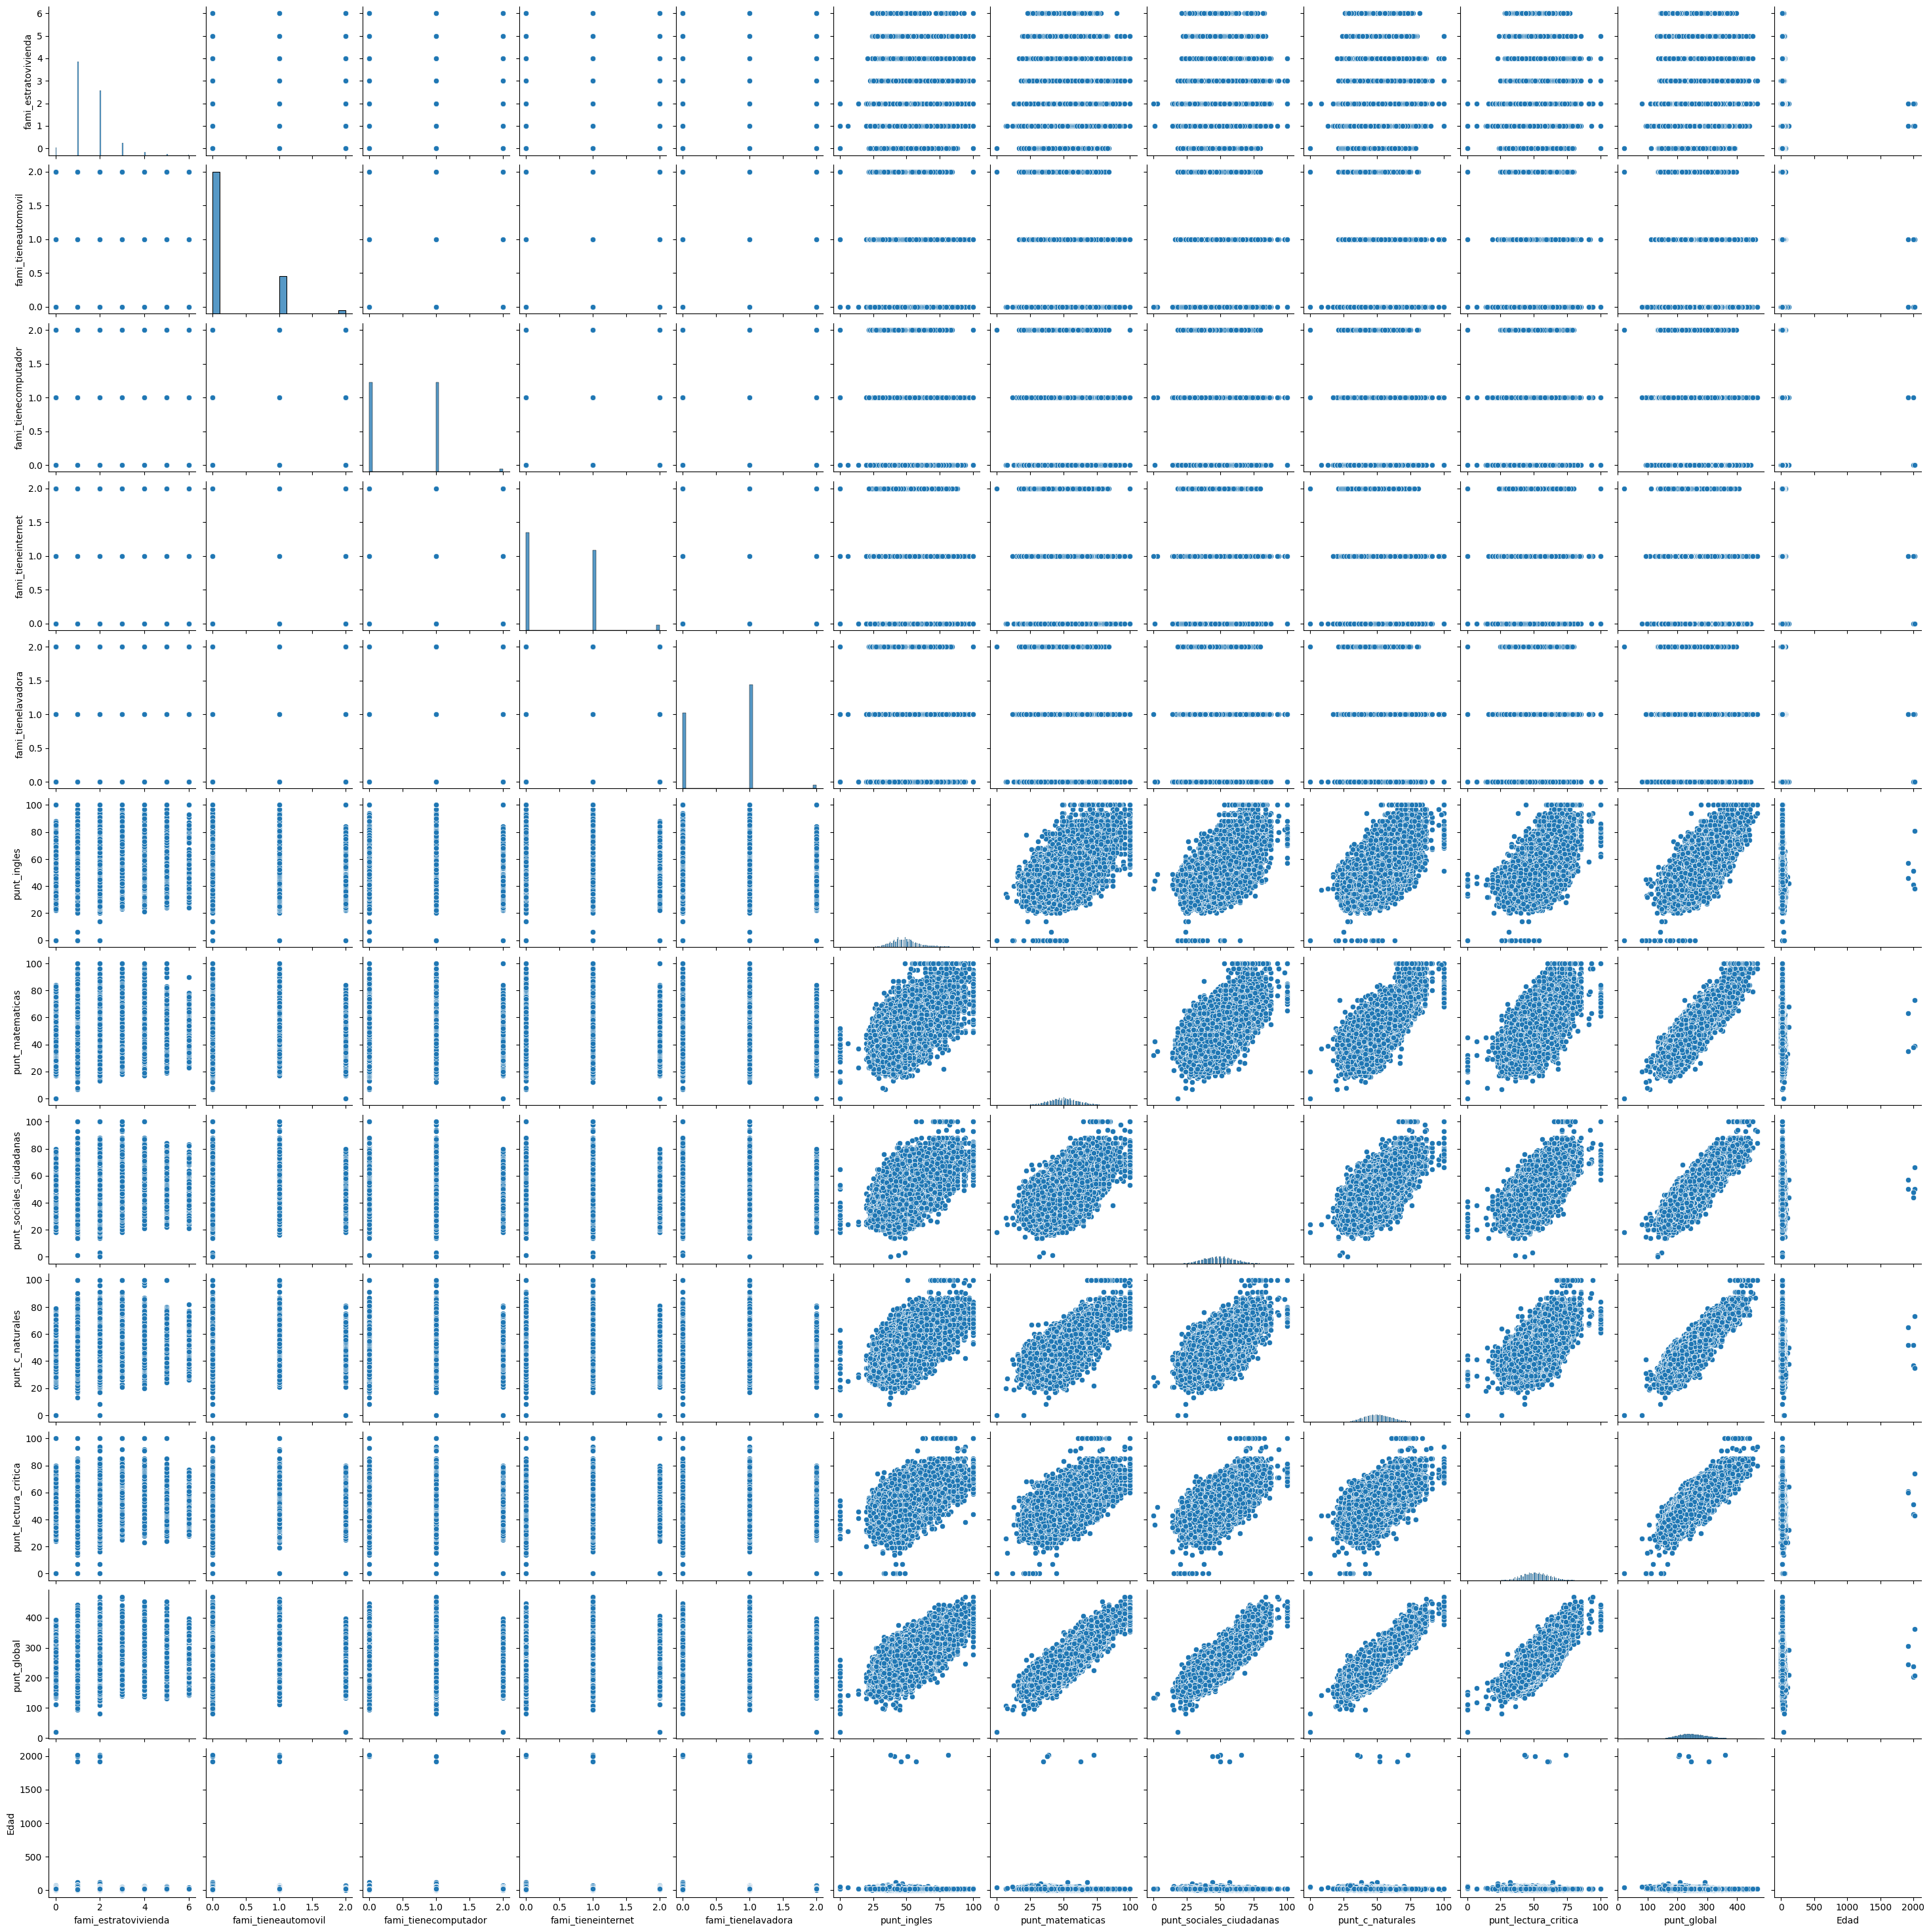

In [26]:
sns.pairplot(data1,)

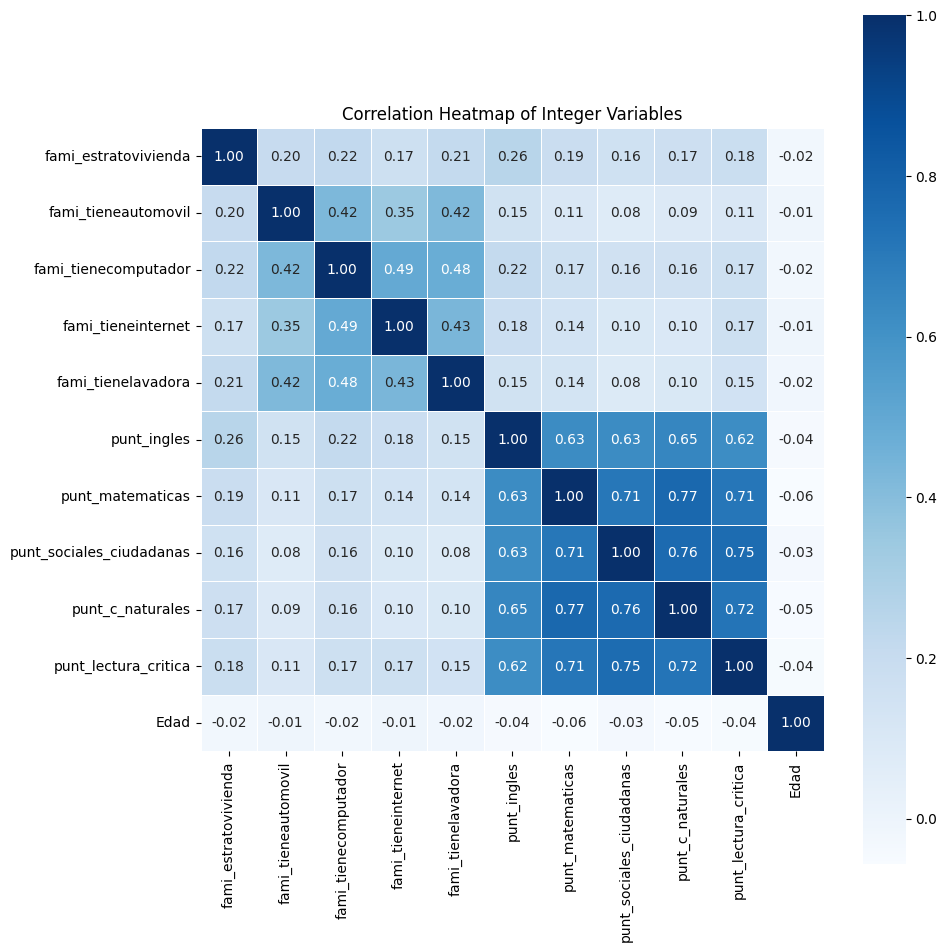

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select int64 and int32 columns, excluding punt_global
int_columns = [col for col in data1.select_dtypes(exclude=['object']).columns if col != 'punt_global']

# Calculate correlation matrix for selected columns
corr = data1[int_columns].corr()

# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="Blues", annot=True, cbar=True, square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Integer Variables')
plt.tight_layout()
plt.show()


<Axes: >

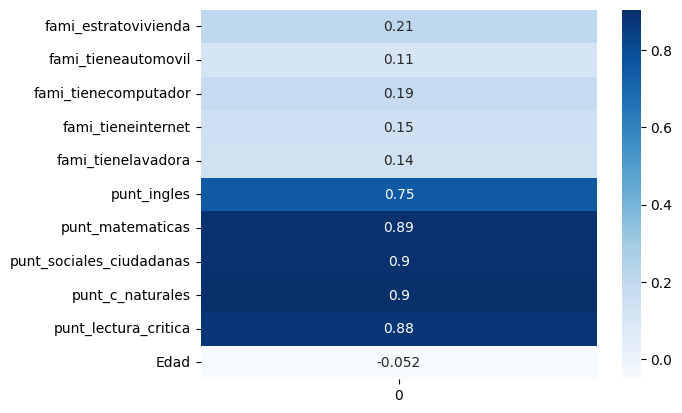

In [28]:
corrw = data1.select_dtypes(exclude=['object']).drop([target], axis=1).corrwith(data1[target])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

## Ajustes basados en correlación

In [30]:
data2 = data1.drop(columns='Edad')

In [31]:
data2.head()

,periodo,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,estu_genero,fami_cuartoshogar,...,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20224,RURAL,N,ACADÉMICO,MIXTO,MAÑANA,GARZÓN,OFICIAL,M,3 a 4,...,0,1,1,1,42.0,64.0,47,41,49,248
1,20224,RURAL,N,ACADÉMICO,MIXTO,COMPLETA,PALERMO,OFICIAL,M,6+,...,0,0,1,0,31.0,33.0,35,31,36,168
2,20224,URBANO,N,ACADÉMICO,MIXTO,SABATINA,PITALITO,NO OFICIAL,F,3 a 4,...,0,0,0,1,43.0,58.0,59,56,64,290
3,20224,URBANO,N,ACADÉMICO,MIXTO,UNICA,NEIVA,OFICIAL,M,unknown,...,2,2,1,2,70.0,59.0,66,57,67,314
4,20224,URBANO,N,TÉCNICO/ACADÉMICO,MIXTO,UNICA,GARZÓN,OFICIAL,F,1 a 2,...,0,0,0,1,42.0,36.0,53,45,61,241


In [32]:
data2.columns

Index(['periodo', 'cole_area_ubicacion', 'cole_bilingue', 'cole_caracter',
       'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion',
       'cole_naturaleza', 'estu_genero', 'fami_cuartoshogar',
       'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda',
       'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador',
       'fami_tieneinternet', 'fami_tienelavadora', 'punt_ingles',
       'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales',
       'punt_lectura_critica', 'punt_global'],
      dtype='object')

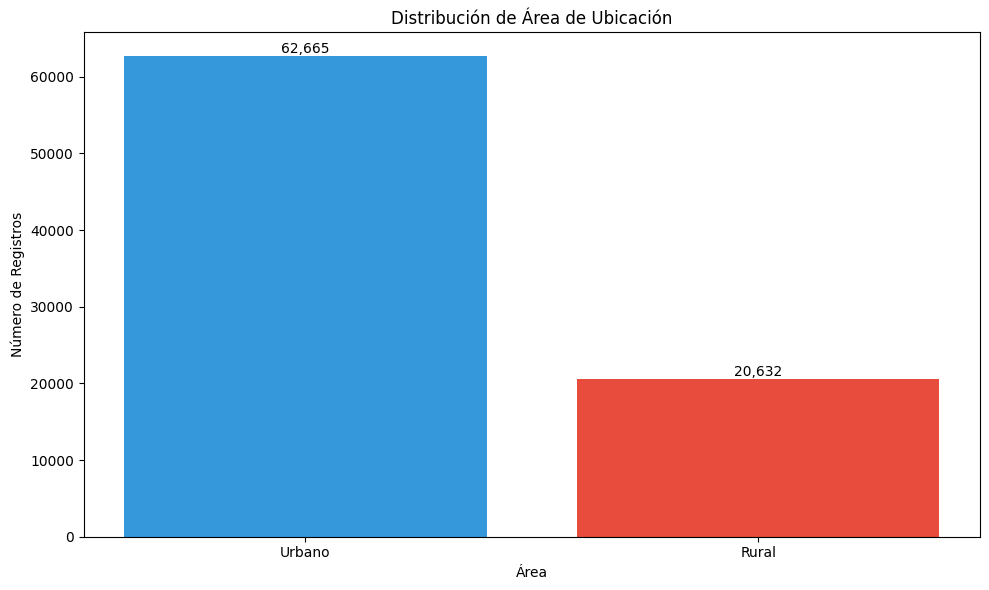

cole_area_ubicacion
URBANO    62665
RURAL     20632
Name: count, dtype: int64


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data with custom labels
area_counts = data['cole_area_ubicacion'].value_counts()
custom_labels = ['Urbano', 'Rural']

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(custom_labels, area_counts, color=['#3498db', '#e74c3c'])  # Blue for Urbano, Red for Rural

plt.title('Distribución de Área de Ubicación')
plt.xlabel('Área')
plt.ylabel('Número de Registros')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the value counts for additional context
print(data['cole_area_ubicacion'].value_counts())

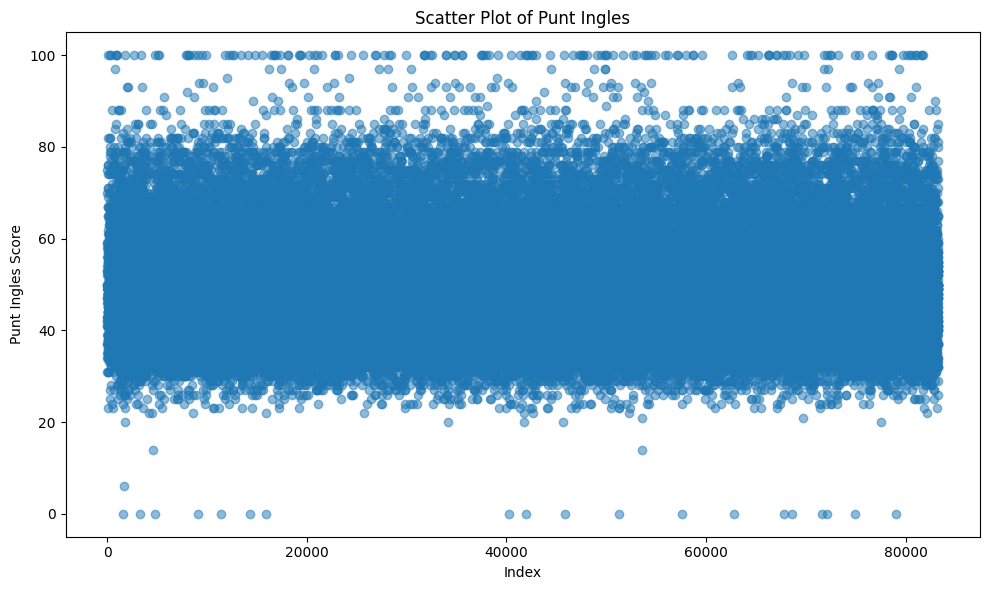

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['punt_ingles'], alpha=0.5)
plt.title('Scatter Plot of Punt Ingles')
plt.xlabel('Index')
plt.ylabel('Punt Ingles Score')
plt.tight_layout()
plt.show()



C:\Users\USER\AppData\Local\Temp\ipykernel_18992\1666397295.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index.map(custom_labels), y=proportions.values, palette=colors)


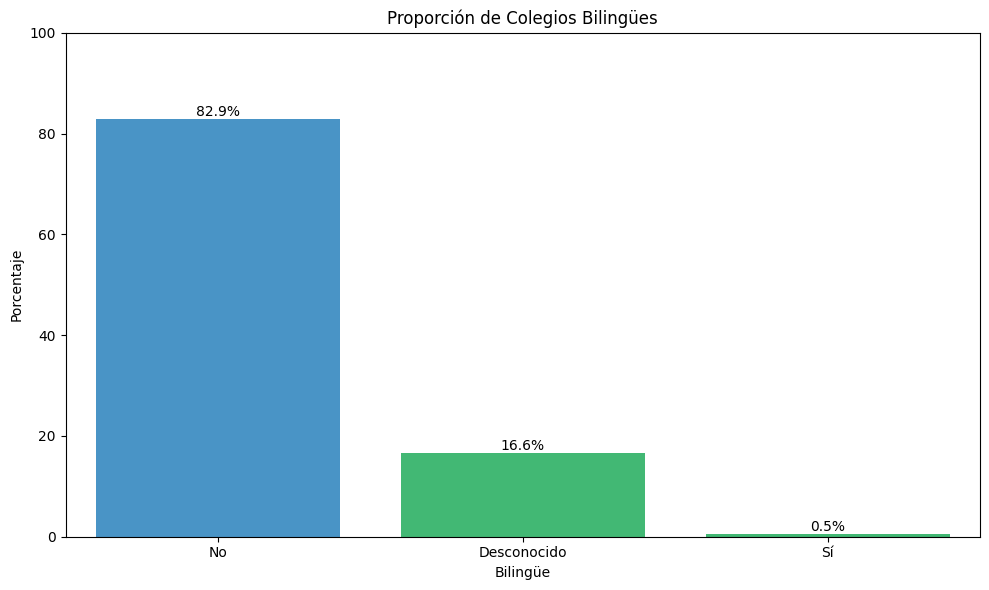

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_value_proportions(column):
    """
    Create a bar plot showing the proportions of unique values in a column with custom colors and labels.
    
    Parameters:
    column (pd.Series): The column to analyze
    """
    # Calculate value counts and proportions
    value_counts = column.value_counts()
    proportions = column.value_counts(normalize=True) * 100

    # Create custom labels
    custom_labels = {'N': 'No', 'S': 'Sí', 'unknown': 'Desconocido'}
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Use different colors for the bars
    colors = ['#3498db', '#2ecc71', '#2ecc71']  # Blue and Green
    sns.barplot(x=proportions.index.map(custom_labels), y=proportions.values, palette=colors)
    
    plt.title('Proporción de Colegios Bilingües')
    plt.xlabel('Bilingüe')
    plt.ylabel('Porcentaje')
    plt.ylim(0, 100)
    
    # Add percentage labels on top of bars
    for i, v in enumerate(proportions.values):
        plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
   

# Call the function on the col_bilingue column
plot_value_proportions(data1['cole_bilingue'])

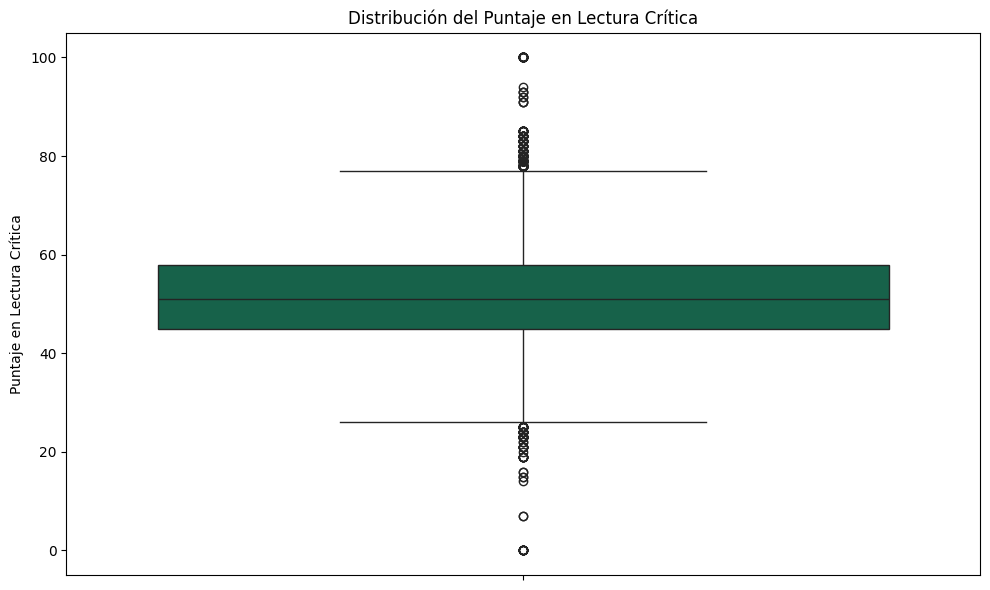

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='punt_lectura_critica', data=data1, color='#0B6E4F')  
plt.title('Distribución del Puntaje en Lectura Crítica')
plt.ylabel('Puntaje en Lectura Crítica')
plt.tight_layout()
plt.show()


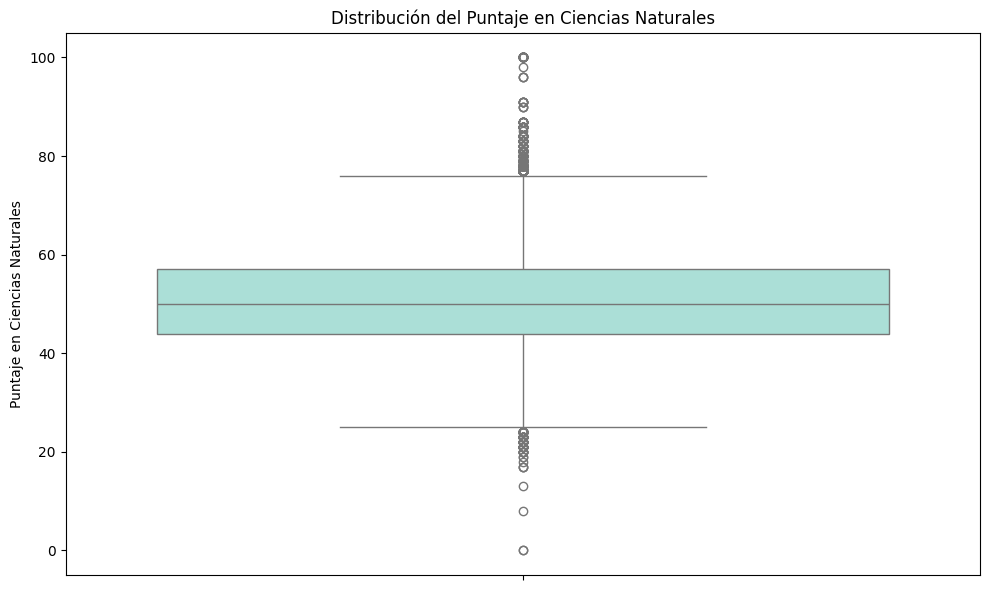

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='punt_c_naturales', data=data1, color='#A2E8DD')  
plt.title('Distribución del Puntaje en Ciencias Naturales')
plt.ylabel('Puntaje en Ciencias Naturales')
plt.tight_layout()
plt.show()

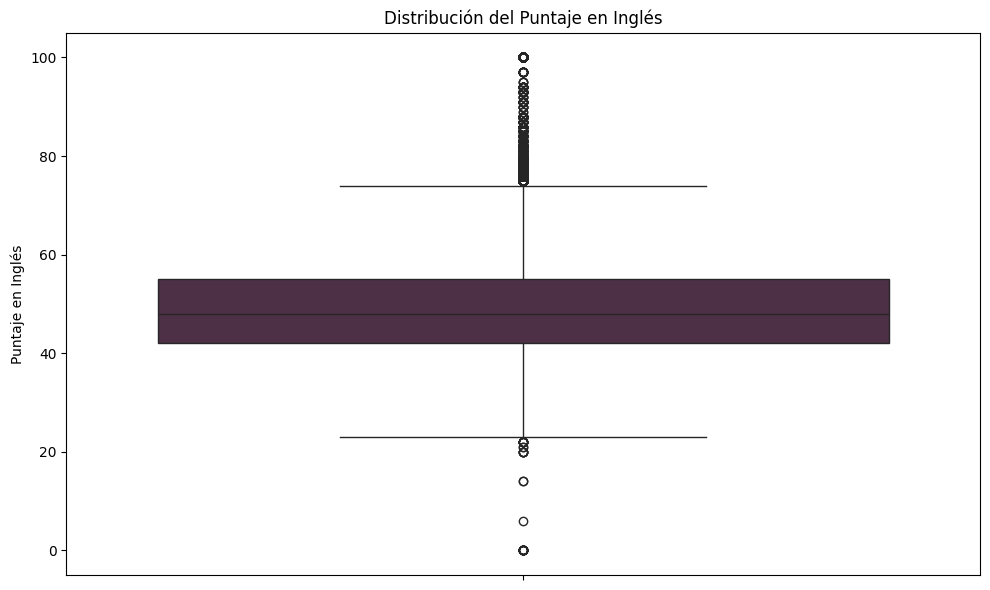

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='punt_ingles', data=data1, color='#522B47')  
plt.title('Distribución del Puntaje en Inglés')
plt.ylabel('Puntaje en Inglés')
plt.tight_layout()
plt.show()


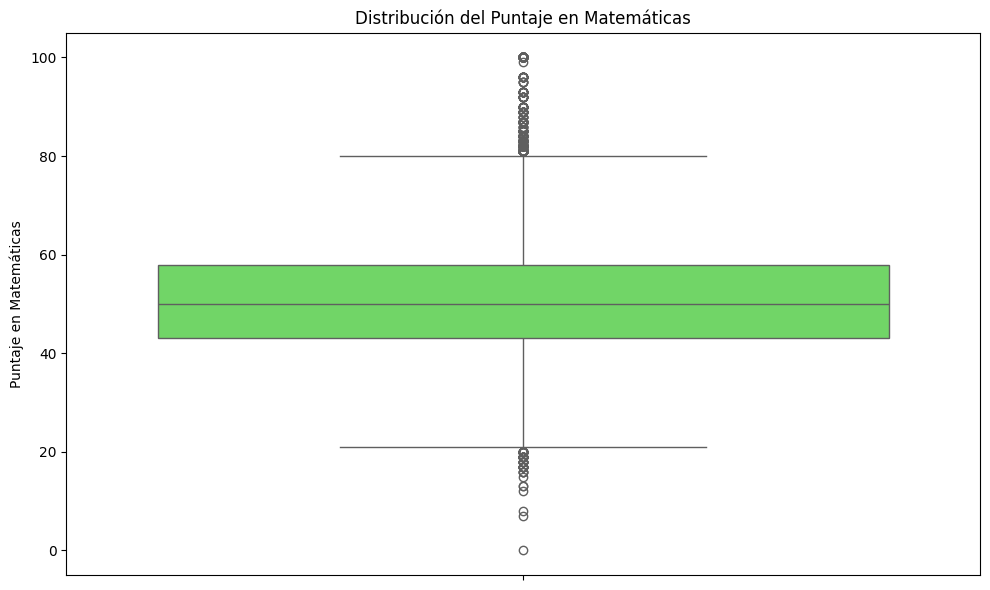

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='punt_matematicas', data=data1, color='#62e755')  
plt.title('Distribución del Puntaje en Matemáticas')
plt.ylabel('Puntaje en Matemáticas')
plt.tight_layout()
plt.show()



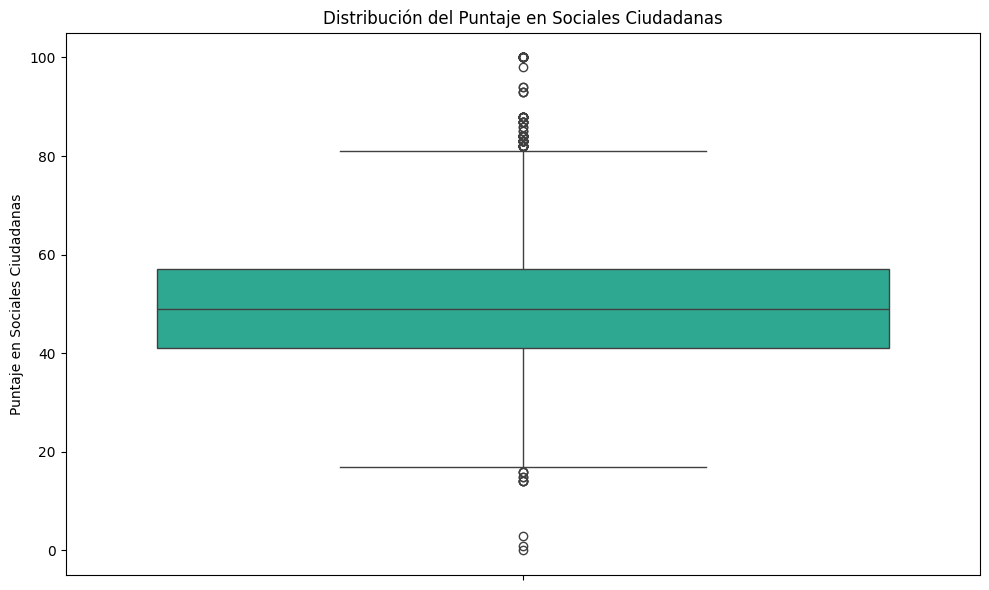

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='punt_sociales_ciudadanas', data=data1, color='#1abc9c')  
plt.title('Distribución del Puntaje en Sociales Ciudadanas')
plt.ylabel('Puntaje en Sociales Ciudadanas')
plt.tight_layout()
plt.show()


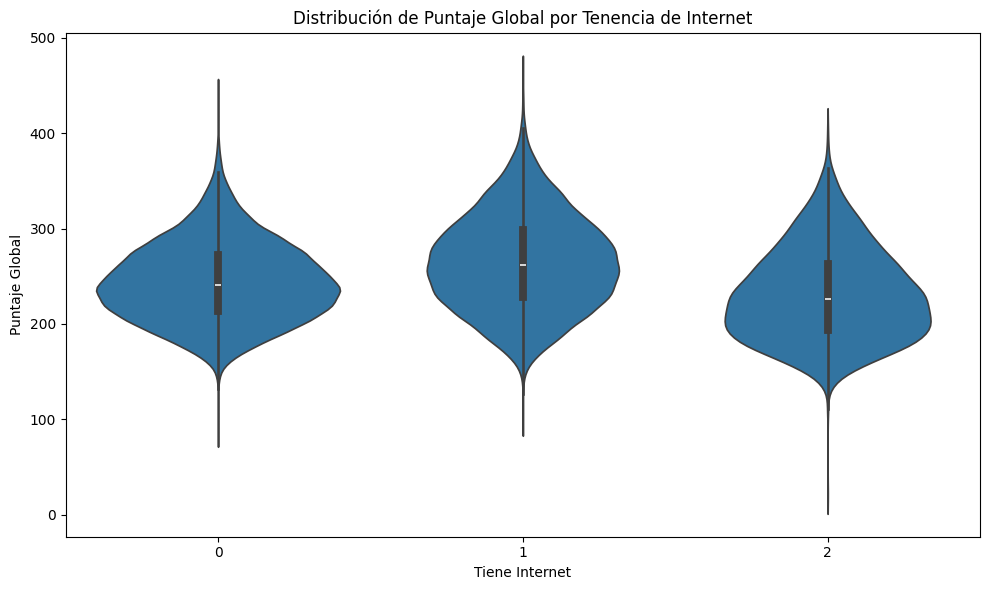

Summary Statistics by Internet Access:
                      count        mean        std   min    25%    50%    75%  \
fami_tieneinternet                                                              
0                   44413.0  244.207462  41.770967  81.0  214.0  241.0  272.0   
1                   36432.0  264.544796  50.071651  95.0  228.0  262.0  299.0   
2                    2452.0  230.945759  48.017242  21.0  194.0  226.0  263.0   

                      max  
fami_tieneinternet         
0                   447.0  
1                   469.0  
2                   406.0  


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='fami_tieneinternet', y='punt_global', data=data1 )
plt.title('Distribución de Puntaje Global por Tenencia de Internet')
plt.xlabel('Tiene Internet')
plt.ylabel('Puntaje Global')
plt.tight_layout()
plt.show()

# Additionally, print some summary statistics
print("Summary Statistics by Internet Access:")
print(data1.groupby('fami_tieneinternet')['punt_global'].describe())

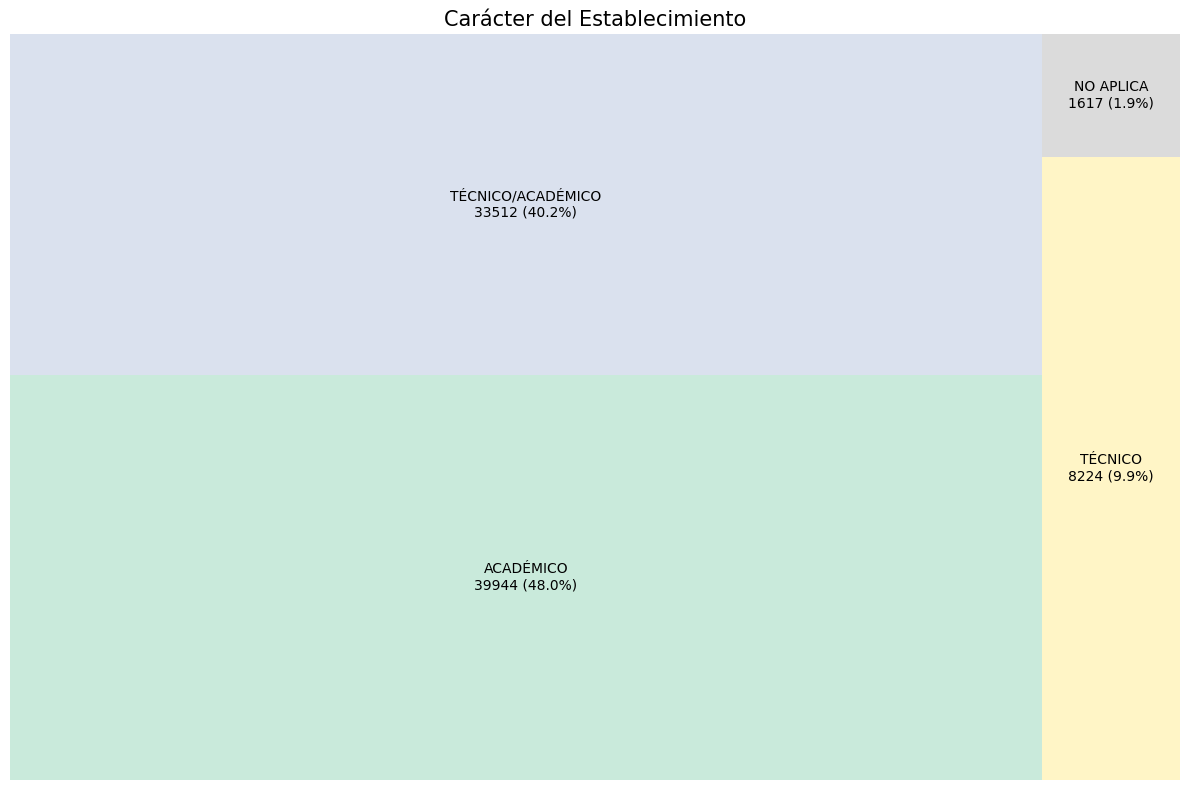

In [53]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

# Calculate value counts
caracter_counts = data1['cole_caracter'].value_counts()

# Create color palette
colors = plt.cm.Pastel2(np.linspace(0, 1, len(caracter_counts)))


plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=caracter_counts.values, 
    label=[f'{index}\n{count} ({count/len(data1)*100:.1f}%)' 
           for index, count in caracter_counts.items()], 
    color=colors, 
    alpha=0.7
)
plt.title("Carácter del Establecimiento", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


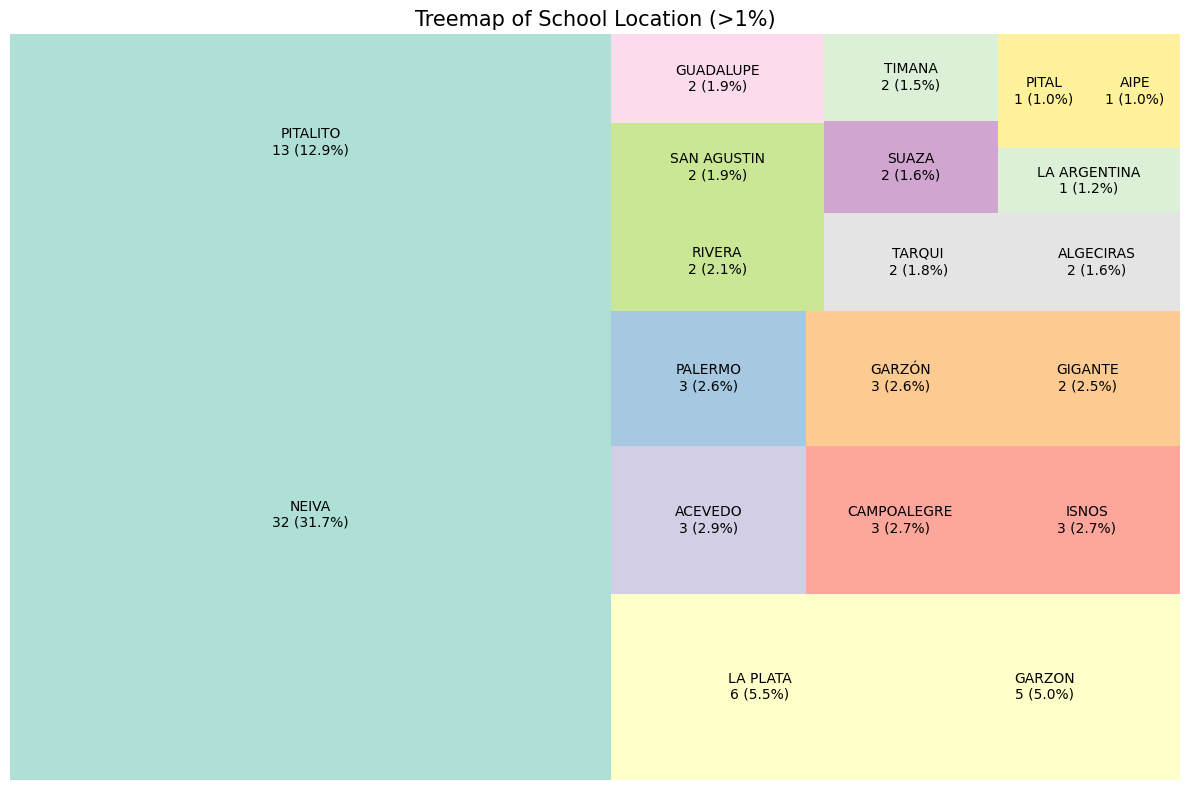

In [47]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

# Calculate value counts
caracter_counts = data1['cole_mcpio_ubicacion'].value_counts()

# Calculate percentage
caracter_percentages = caracter_counts / len(data1) * 100

# Filter to include only categories > 1%
filtered_caracter_counts = caracter_percentages[caracter_percentages > 1]

# Choose a different color palette (try these alternatives):
# 1. plt.cm.Spectral
# 2. plt.cm.Set3
# 3. plt.cm.tab20
# 4. plt.cm.Paired
# 5. plt.cm.Set1
colors = plt.cm.Set3(np.linspace(0, 1, len(filtered_caracter_counts)))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=filtered_caracter_counts.values, 
    label=[f'{index}\n{count:.0f} ({count:.1f}%)' 
           for index, count in filtered_caracter_counts.items()], 
    color=colors, 
    alpha=0.7
)
plt.title('Treemap of School Location (>1%)', fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18992\2191392026.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='periodo', y='punt_global', data=data1, palette=['#16697A', '#BBA0CA','#82C0CC', '#CA054D', '#FFA62B'])
C:\Users\USER\AppData\Local\Temp\ipykernel_18992\2191392026.py:5: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='periodo', y='punt_global', data=data1, palette=['#16697A', '#BBA0CA','#82C0CC', '#CA054D', '#FFA62B'])


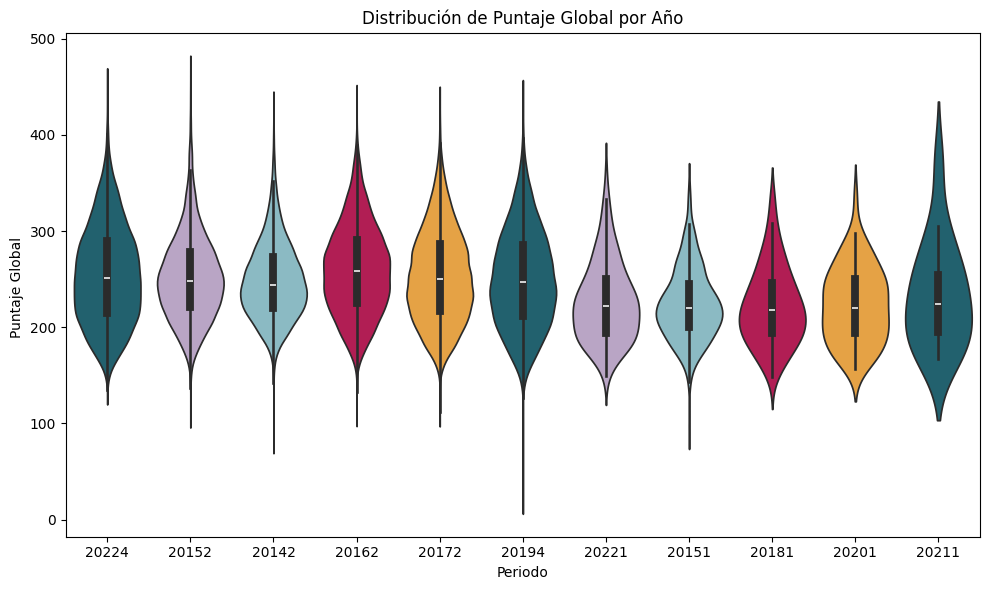

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='periodo', y='punt_global', data=data1, palette=['#16697A', '#BBA0CA','#82C0CC', '#CA054D', '#FFA62B'])
plt.title('Distribución de Puntaje Global por Año')
plt.xlabel('Periodo')
plt.ylabel('Puntaje Global ')
plt.tight_layout()
plt.show()

